# Proyecto Deep Learning

Profesor:

Integrantes:
- Miguel Castillo Huebner
- Pedro Betanzo J.
- Fernando Basterrechea
- Ricardo Muñoz Ortega

## Reconocimiento de señales de tránsito

El reconocimiento automatizado de señales de tránsito es fundamental para mejorar la seguridad vial y habilitar tecnologías de conducción autónoma. Los sistemas avanzados de asistencia al conductor dependen de una clasificación precisa de las señales para interpretar el entorno vial en tiempo real. Este proyecto busca clasificar 58 categorías de señales de tránsito utilizando Deep Learning, con un conjunto de entrenamiento de aproximadamente 120 imágenes por clase y un conjunto de prueba con 1994 imágenes. 

## Marco Teórico

Las arquitecturas de redes neuronales mas conocidas son:

1. **Perceptrón Multicapa (MLP)**: Red neuronal donde cada capa esta conectada a todas las neuronas de la capa siguiente. Se utiliza para tareas básicas de clasificación y regresión. Datos estructurados y reducidos.

2. **Redes Neuronales Convolucionales (CNN)**: Utilizan capas de convolución que aplican filtros sobre las entradas para extraer características espaciales, especialmente de imágenes. Se emplean en el procesamiento de imágenes, clasificación, detección de objetos, segmentación, reconocimiento facial y videos.

3. **Redes Neuronales Recurrentes (RNN)**: Redes con conexiones de retroalimentación, cuentan con un estado y procesa secuencia de datos. Se utilizan en NLP, series temporales, traducción de automática, análisis de sentimiento y generación de texto.

4. **Redes de Memoria a Largo Plazo (LSTM)**: Tiene la capacidad de recordar información a largo plazo, soluciona el problema del desvanecimiento del gradiente. se emplea en series temporales, predicción financiera, generación de texto, traducción, procesamiento de voz y video secuencial.

5. **Unidades de Puerta Recurrente (GRU)**: Estructura mas simple y con menos parámetros de una LSTM. Se emplean en problemas de secuencias.

6. **Redes Generativas Antagónicas (GAN)**: Se compone de un red generadora y otra desciminadora que compiten, la funcion de la red generadora es crear datos falsos que el discriminador debe clasificar. Se emplea en generación de imágenes, superresolución, generación de datos, deepfake y arte generativo. 

7. **Autoencoders**: Redes que comprimen los datos de entrada en una representación de menor dimensión para luego reconstruirlos. Se emplea en compresión de datos, reducción de dimensionalidad, eliminación de ruido, generación de datos y detección de anomalías.

8. **Redes de Convolución 3D (3D-CNN)**: Capturar información espacial y temporal, su funcionamiento es similar a una CNN. Se utiliza en análisis de video, diagnóstico médico, detección de acciones y procesamiento de secuencia de imágenes.

9. **Transformers**: Cuentan con mecanismos de autoatención para modelar relaciones de largo alcance en secuencias, permiten el procesamiento en paralelo de mejor forma que las RNN. Utilizadas en traducción automática, generación de texto (GPT, BERT), chatbots, análisis de sentimientos, modelación de secuencias y visión por computadoras. 

10. **Redes de Memoria Diferenciable (DNC)**: Utilizan memorias externas, permitiendo labores mas complejas. Empleados en navegación en grafos, recuperación de información y procesamiento de datos con estructuras complejas.

11. **Redes de Capsulas (CapsNet)**: Capsulas que capturan relaciones espaciales de las características. Utilizadas en reconocimiento de imagenes, detección de objetos 3D y visión por computadora.

12. **Redes de Refuerzo Profundo**: Combinación de las arquitecturas anteriores con aprendizaje por refuerzo, permitiendo al agente aprender a tomar desiciones. Empleadas en juegos, robótica, sistemas de recomendación, autónomia y simulaciones.



## Dependencias

In [1]:
import torch
from torchvision import datasets, transforms
import pandas as pd
import os
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from matplotlib import pyplot as plt
import random

## Dataset

Existen 58 clases y 120 imagenes por cada una. El archivo <code>labels.csv</code> contiene la descripción de las clases de las señales de tránsito. 

Dispobible en: [dataset](https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/data)


In [139]:
etiquetas = pd.read_csv('labels.csv')
etiquetas.sample(3)

,ClassId,Name
5,5,Speed limit (60km/h)
30,30,Bicycles crossing
29,29,Horn


In [140]:
etiquetas.shape

(58, 2)

In [141]:
def mostrar_img(ruta):
    img = Image.open(ruta)
    print(f'Tamaño: {img.size}')
    print(f'Color: {img.mode}')
    print(f'Info: {img.info}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Tamaño: (134, 128)
Color: RGB
Info: {'dpi': (96.012, 96.012)}


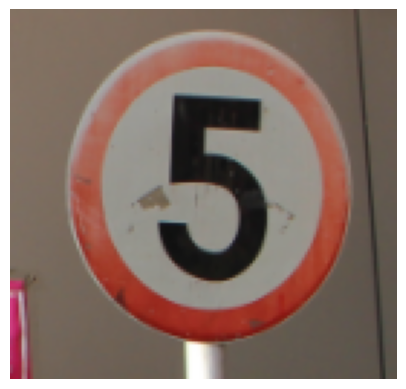

In [142]:
mostrar_img('traffic_Data/DATA/0/000_1_0001.png')

In [143]:
dataset = datasets.ImageFolder(root='traffic_Data/DATA')
class_to_idx = dataset.class_to_idx
idx_to_class = {value: int(key) for key, value in class_to_idx.items()}

In [166]:
print(f'Total de imgs: {len(dataset)}')

Total de imgs: 4170


In [156]:
print(f'Total de clases {len(dataset.classes)}')

Total de clases 58


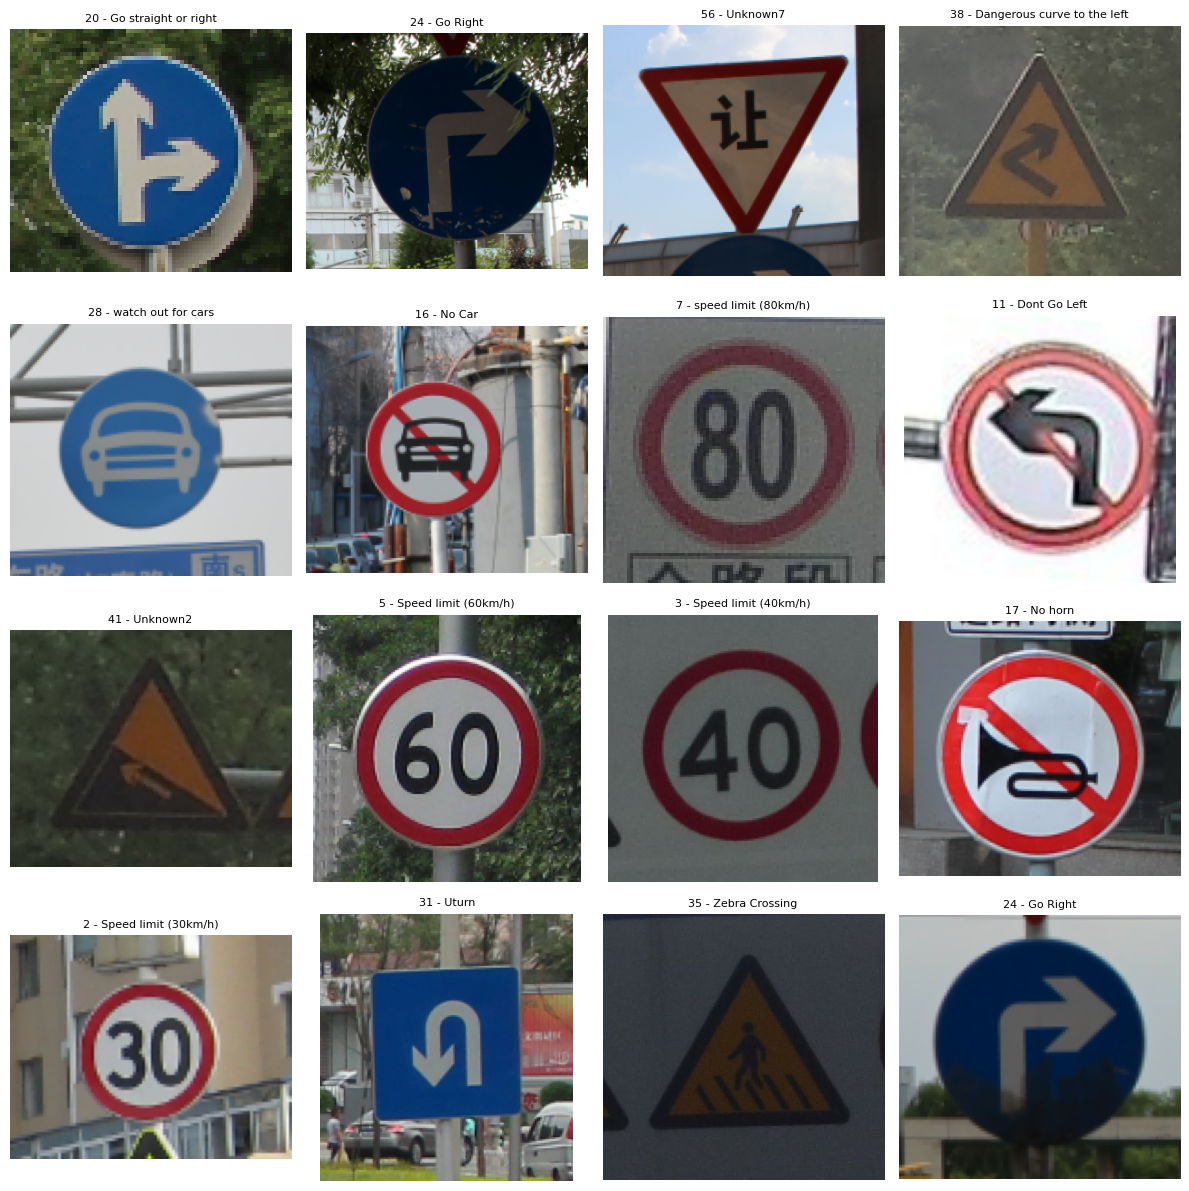

In [164]:
random_indices = random.sample(range(len(dataset)),16)
plt.figure(figsize=(12,12))
for i, idx in enumerate(random_indices):
    ruta_img, etiqueta = dataset.samples[idx]
    img = Image.open(ruta_img)
    plt.subplot(4,4,i+1)
    plt.imshow(img)
    nombre_etiqueta = etiquetas[etiquetas['ClassId']==idx_to_class[etiqueta]]['Name'].iloc[0]
    plt.title(
        f'{idx_to_class[etiqueta]} - {nombre_etiqueta}', 
        fontsize=8
    )
    plt.axis('off')
plt.tight_layout()
plt.show()

In [165]:
etiquetas.head(3)

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)


## Análisis exploratorio

...pendiente

## Device GPU/CPU

In [167]:
torch.cuda.is_available()

True

In [168]:
for p in str(torch.cuda.get_device_properties(0)).split(','):
    print(p)

_CudaDeviceProperties(name='NVIDIA GeForce RTX 3050 Laptop GPU'
 major=8
 minor=6
 total_memory=4095MB
 multi_processor_count=16
 uuid=2f4ed69d-379c-ec90-87cf-d433206fdb67
 L2_cache_size=1MB)


In [169]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## Preprocesamiento

- 128x128 o 224x224: Balance entre detalle y eficiencia, común para tareas de clasificación en modelos como ResNet y MobileNet.

- 256x256 o 512x512: Útil para tareas que requieren más detalles (como detección de objetos compleja).

In [170]:
prepro = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, ),(0.5, ))
    ]
)

dataset = datasets.ImageFolder(root='traffic_data/DATA',transform=prepro)
class_to_idx = dataset.class_to_idx
idx_to_class = {value: int(key) for key, value in class_to_idx.items()}


## División de los datos

In [179]:
n_train =  int(0.8 * len(dataset))
train, val = random_split(
    dataset,
    [
        n_train,
        len(dataset) - n_train
    ]
)

In [180]:
cargador_entr = DataLoader(
    train,
    batch_size=32,
    shuffle=True
) 
cargador_val = DataLoader(
    val,
    batch_size=32,
    shuffle=False
)

## Ajuste Modelo

In [181]:
class SeñalesRed(nn.Module):

    def __init__(self, num_clasess=58):
        super(SeñalesRed, self).__init__()
        self.conv1 = nn.Conv2d(
            3,
            32,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv2 = nn.Conv2d(
            32,
            64,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.conv3 = nn.Conv2d(
            64,
            128,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.fc1 = nn.Linear(128*8*8,512)
        self.fc2 = nn.Linear(512, num_clasess)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [182]:
modelo_cnn = SeñalesRed(num_clasess=58) 
modelo_cnn = modelo_cnn.to(device)

In [183]:
print(next(modelo_cnn.parameters()).device)

cuda:0


## Optimizador y Función de Pérdida

In [184]:
floss = nn.CrossEntropyLoss() 
floss = floss.to(device)
opt = optim.Adam(modelo_cnn.parameters(), lr=0.001)

## Ajuste Modelo

In [185]:
num_epochs = 30

for epoch in range(num_epochs):
    modelo_cnn.train()
    running_loss = 0.0
    for images, labels in cargador_entr:
        images, labels = images.to(device), labels.to(device)
        opt.zero_grad()
        outputs = modelo_cnn(images)
        loss = floss(outputs, labels)
        loss.backward()
        opt.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(cargador_entr)}")

    # Evaluación en el conjunto de validación
    modelo_cnn.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in cargador_val:
            images, labels = images.to(device), labels.to(device)
            outputs = modelo_cnn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy: {100 * correct / total}%")

    #torch.save(modelo_cnn.state_dict(),'SeñalesRed.pth')

Epoch 1/30, Loss: 2.201002271970113
Accuracy: 73.26139088729016%
Epoch 2/30, Loss: 0.5604082066388357
Accuracy: 90.64748201438849%
Epoch 3/30, Loss: 0.19525158827503522
Accuracy: 94.12470023980815%
Epoch 4/30, Loss: 0.1012869468856869
Accuracy: 95.68345323741008%
Epoch 5/30, Loss: 0.03225619421032856
Accuracy: 97.60191846522781%
Epoch 6/30, Loss: 0.020850408477279068
Accuracy: 97.3621103117506%
Epoch 7/30, Loss: 0.02481816890968254
Accuracy: 98.08153477218225%
Epoch 8/30, Loss: 0.006452938144156222
Accuracy: 98.20143884892086%
Epoch 9/30, Loss: 0.04973407727742424
Accuracy: 97.60191846522781%
Epoch 10/30, Loss: 0.07803287311856236
Accuracy: 97.00239808153478%
Epoch 11/30, Loss: 0.021517176669017535
Accuracy: 98.32134292565948%
Epoch 12/30, Loss: 0.001264912564959429
Accuracy: 98.44124700239809%
Epoch 13/30, Loss: 0.00941112526865514
Accuracy: 97.24220623501199%
Epoch 14/30, Loss: 0.01210972947753492
Accuracy: 98.32134292565948%
Epoch 15/30, Loss: 0.0003740589230541705
Accuracy: 98.8009

## Testing modelo

In [187]:
prepro_test = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, ),(0.5, ))
    ]
)

In [202]:
ruta_img = 'traffic_Data/TEST/002_1_0014.png'
imagen = Image.open(ruta_img).convert('RGB')
imagen = prepro_test(imagen)
imagen = imagen.unsqueeze(0)
imagen = imagen.to(device)


In [203]:
with torch.no_grad():
    salida = modelo_cnn(imagen)

_, prediccion = torch.max(salida, 1)  
clase_pred = prediccion.item() 
print("Clase:", etiquetas[etiquetas['ClassId']==idx_to_class[clase_pred]] )

Clase:    ClassId                  Name
4        4  Speed limit (50km/h)


In [204]:
etiquetas[etiquetas['ClassId']==2]

,ClassId,Name
2,2,Speed limit (30km/h)


In [200]:
carpeta_test = 'traffic_Data/TEST/'
correctas = 0
total = 0
resultados = []

for nombre_imagen in os.listdir(carpeta_test):
    etiqueta = nombre_imagen.split('_')[0]
    ruta_img = os.path.join(carpeta_test,nombre_imagen)
    img = Image.open(ruta_img).convert('RGB')
    img = prepro_test(img).unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        salida = modelo_cnn(img)
        etiqueta_pred = torch.argmax(salida, dim=1).item()
    
    pred_correcta = (int(etiqueta) == int(idx_to_class[etiqueta_pred]))
    correctas += int(pred_correcta)
    total +=1
    r = (nombre_imagen,etiqueta,idx_to_class[etiqueta_pred],pred_correcta)
    #print(r)
    resultados.append(r)

accuracy = 100.00 * correctas/total if total > 0 else 0
accuracy

64.69408224674022

In [201]:
resultados

[('000_0001_j.png', '000', 42, False),
 ('000_0002_j.png', '000', 0, True),
 ('000_0003_j.png', '000', 14, False),
 ('000_0004_j.png', '000', 0, True),
 ('000_0005_j.png', '000', 0, True),
 ('000_0006_j.png', '000', 0, True),
 ('000_0007_j.png', '000', 0, True),
 ('000_1_0001_1_j.png', '000', 42, False),
 ('000_1_0002_1_j.png', '000', 0, True),
 ('000_1_0003_1_j.png', '000', 14, False),
 ('000_1_0004_1_j.png', '000', 0, True),
 ('000_1_0005_1_j.png', '000', 0, True),
 ('000_1_0006_1_j.png', '000', 0, True),
 ('000_1_0007_1_j.png', '000', 0, True),
 ('001_0001_j.png', '001', 5, False),
 ('001_0002_j.png', '001', 1, True),
 ('001_0003_j.png', '001', 3, False),
 ('001_0004_j.png', '001', 5, False),
 ('001_0005_j.png', '001', 1, True),
 ('001_0006_j.png', '001', 0, False),
 ('001_1_0001_1_j.png', '001', 5, False),
 ('001_1_0002_1_j.png', '001', 1, True),
 ('001_1_0003_1_j.png', '001', 3, False),
 ('001_1_0004_1_j.png', '001', 5, False),
 ('001_1_0005_1_j.png', '001', 1, True),
 ('001_1_000